# Version

In [1]:
i = 6

# Import python dataset

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset,network

# Load Data

In [3]:
# Preprocessing

scenario= "sinus" #sinus, helix
#n_instance = 1000
n_instance = 1000
n_features = 2
Z = 6 #3的倍數
nodes = 8 #4
var = 4
use_bias = 'True'
scales = ['-1-1','0-1']
scaled = '-1-1'

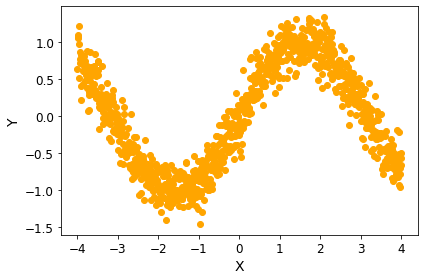

In [4]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [5]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

made dataset


# AAE

### Architecture

In [6]:
encoder=network.build_encoder(Z, nodes, n_features)
decoder=network.build_decoder(Z, var, n_features, use_bias)
discriminator=network.build_discriminator(Z, nodes)
discriminator.summary()

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         2048        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1024)         4096        dense[0][0]                      
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 1024)         0           batch_normalization[0][0]        
____________________________________________________________________________________________

### Preprocessing

In [7]:
import AAE_Model

GANorWGAN='WGAN' #GAN
epochs = 2000 #2000
batch_size = 100

In [8]:
aae = AAE_Model.AAE(i, Z, n_features, batch_size, GANorWGAN, nodes, var, use_bias)

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 1024)         2048        input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 1024)         4096        dense_11[0][0]                   
__________________________________________________________________________________________________
re_lu_11 (ReLU)                 (None, 1024)         0           batch_normalization_14[0][0]     
____________________________________________________________________________________________

In [9]:
train_dataset, scaler, X_train_scaled = aae.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)


data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


### latent variable

## Training

1 [D real: -0.235377, D fake: 0.234863], [Enc/Dec loss: 0.635211, Enc/Dis: 0.640464]
2 [D real: -0.229651, D fake: 0.240557], [Enc/Dec loss: 0.405527, Enc/Dis: 0.410447]
3 [D real: -0.235254, D fake: 0.246775], [Enc/Dec loss: 0.259123, Enc/Dis: 0.263795]
4 [D real: -0.233594, D fake: 0.249198], [Enc/Dec loss: 0.222373, Enc/Dis: 0.226886]
5 [D real: -0.237298, D fake: 0.252700], [Enc/Dec loss: 0.183792, Enc/Dis: 0.188131]
6 [D real: -0.236225, D fake: 0.253100], [Enc/Dec loss: 0.184232, Enc/Dis: 0.188476]
7 [D real: -0.238939, D fake: 0.252750], [Enc/Dec loss: 0.160809, Enc/Dis: 0.164935]
8 [D real: -0.239969, D fake: 0.254306], [Enc/Dec loss: 0.152416, Enc/Dis: 0.156376]
9 [D real: -0.240639, D fake: 0.255459], [Enc/Dec loss: 0.138156, Enc/Dis: 0.141971]
10 [D real: -0.243655, D fake: 0.253370], [Enc/Dec loss: 0.129201, Enc/Dis: 0.132892]
11 [D real: -0.239578, D fake: 0.244480], [Enc/Dec loss: 0.121896, Enc/Dis: 0.125483]
12 [D real: -0.245465, D fake: 0.256937], [Enc/Dec loss: 0.1136

94 [D real: -0.238719, D fake: 0.242076], [Enc/Dec loss: 0.076827, Enc/Dis: 0.080601]
95 [D real: -0.237014, D fake: 0.240361], [Enc/Dec loss: 0.064206, Enc/Dis: 0.070163]
96 [D real: -0.239250, D fake: 0.241167], [Enc/Dec loss: 0.068473, Enc/Dis: 0.074611]
97 [D real: -0.238045, D fake: 0.243702], [Enc/Dec loss: 0.060788, Enc/Dis: 0.065978]
98 [D real: -0.239224, D fake: 0.242474], [Enc/Dec loss: 0.069180, Enc/Dis: 0.075005]
99 [D real: -0.240476, D fake: 0.243996], [Enc/Dec loss: 0.069689, Enc/Dis: 0.075026]
100 [D real: -0.244648, D fake: 0.246624], [Enc/Dec loss: 0.069245, Enc/Dis: 0.071793]
101 [D real: -0.233827, D fake: 0.249749], [Enc/Dec loss: 0.068609, Enc/Dis: 0.074015]
102 [D real: -0.242092, D fake: 0.247461], [Enc/Dec loss: 0.065268, Enc/Dis: 0.070882]
103 [D real: -0.243646, D fake: 0.250029], [Enc/Dec loss: 0.071765, Enc/Dis: 0.076708]
104 [D real: -0.243209, D fake: 0.250229], [Enc/Dec loss: 0.065366, Enc/Dis: 0.070731]
105 [D real: -0.238591, D fake: 0.247535], [Enc/D

189 [D real: -0.279232, D fake: 0.276769], [Enc/Dec loss: 0.066497, Enc/Dis: 0.071270]
190 [D real: -0.281138, D fake: 0.277678], [Enc/Dec loss: 0.064417, Enc/Dis: 0.070480]
191 [D real: -0.302140, D fake: 0.267729], [Enc/Dec loss: 0.068409, Enc/Dis: 0.074525]
192 [D real: -0.286801, D fake: 0.271728], [Enc/Dec loss: 0.063280, Enc/Dis: 0.069404]
193 [D real: -0.278312, D fake: 0.268035], [Enc/Dec loss: 0.069388, Enc/Dis: 0.075612]
194 [D real: -0.281519, D fake: 0.267138], [Enc/Dec loss: 0.066171, Enc/Dis: 0.071215]
195 [D real: -0.284049, D fake: 0.274018], [Enc/Dec loss: 0.067706, Enc/Dis: 0.072125]
196 [D real: -0.286347, D fake: 0.272015], [Enc/Dec loss: 0.074280, Enc/Dis: 0.078946]
197 [D real: -0.285724, D fake: 0.273945], [Enc/Dec loss: 0.068989, Enc/Dis: 0.073909]
198 [D real: -0.287191, D fake: 0.274514], [Enc/Dec loss: 0.067598, Enc/Dis: 0.072621]
199 [D real: -0.288786, D fake: 0.273653], [Enc/Dec loss: 0.059027, Enc/Dis: 0.064748]
200 [D real: -0.290995, D fake: 0.272874], 

284 [D real: -0.308122, D fake: 0.285382], [Enc/Dec loss: 0.060067, Enc/Dis: 0.064077]
285 [D real: -0.313653, D fake: 0.288027], [Enc/Dec loss: 0.063972, Enc/Dis: 0.067953]
286 [D real: -0.314633, D fake: 0.291491], [Enc/Dec loss: 0.063581, Enc/Dis: 0.067590]
287 [D real: -0.315007, D fake: 0.287023], [Enc/Dec loss: 0.062835, Enc/Dis: 0.067355]
288 [D real: -0.314448, D fake: 0.288025], [Enc/Dec loss: 0.068995, Enc/Dis: 0.073652]
289 [D real: -0.313032, D fake: 0.289032], [Enc/Dec loss: 0.059522, Enc/Dis: 0.064176]
290 [D real: -0.313045, D fake: 0.289015], [Enc/Dec loss: 0.060808, Enc/Dis: 0.065542]
291 [D real: -0.279793, D fake: 0.285354], [Enc/Dec loss: 0.070200, Enc/Dis: 0.074769]
292 [D real: -0.302875, D fake: 0.306722], [Enc/Dec loss: 0.063038, Enc/Dis: 0.067537]
293 [D real: -0.310581, D fake: 0.308221], [Enc/Dec loss: 0.066817, Enc/Dis: 0.069772]
294 [D real: -0.318830, D fake: 0.305813], [Enc/Dec loss: 0.068690, Enc/Dis: 0.071719]
295 [D real: -0.321463, D fake: 0.300941], 

379 [D real: -0.364851, D fake: 0.312018], [Enc/Dec loss: 0.068239, Enc/Dis: 0.071001]
380 [D real: -0.370622, D fake: 0.311306], [Enc/Dec loss: 0.067962, Enc/Dis: 0.070443]
381 [D real: -0.396016, D fake: 0.302734], [Enc/Dec loss: 0.065326, Enc/Dis: 0.067949]
382 [D real: -0.397889, D fake: 0.326944], [Enc/Dec loss: 0.068619, Enc/Dis: 0.071503]
383 [D real: -0.389057, D fake: 0.339613], [Enc/Dec loss: 0.064558, Enc/Dis: 0.067521]
384 [D real: -0.384282, D fake: 0.341273], [Enc/Dec loss: 0.065156, Enc/Dis: 0.068589]
385 [D real: -0.378496, D fake: 0.337013], [Enc/Dec loss: 0.065975, Enc/Dis: 0.070114]
386 [D real: -0.378506, D fake: 0.337192], [Enc/Dec loss: 0.059774, Enc/Dis: 0.064428]
387 [D real: -0.377314, D fake: 0.337806], [Enc/Dec loss: 0.066384, Enc/Dis: 0.070974]
388 [D real: -0.377818, D fake: 0.335863], [Enc/Dec loss: 0.060943, Enc/Dis: 0.065524]
389 [D real: -0.378759, D fake: 0.338318], [Enc/Dec loss: 0.066237, Enc/Dis: 0.070605]
390 [D real: -0.382383, D fake: 0.336788], 

474 [D real: -0.623455, D fake: 0.353227], [Enc/Dec loss: 0.058746, Enc/Dis: 0.065675]
475 [D real: -0.599608, D fake: 0.359714], [Enc/Dec loss: 0.055588, Enc/Dis: 0.062381]
476 [D real: -0.602095, D fake: 0.350079], [Enc/Dec loss: 0.061403, Enc/Dis: 0.068285]
477 [D real: -0.605567, D fake: 0.354847], [Enc/Dec loss: 0.061215, Enc/Dis: 0.068405]
478 [D real: -0.612334, D fake: 0.354306], [Enc/Dec loss: 0.060370, Enc/Dis: 0.067450]
479 [D real: -0.611156, D fake: 0.351967], [Enc/Dec loss: 0.062195, Enc/Dis: 0.069222]
480 [D real: -0.612411, D fake: 0.352875], [Enc/Dec loss: 0.059567, Enc/Dis: 0.066681]
481 [D real: -0.532012, D fake: 0.441040], [Enc/Dec loss: 0.058575, Enc/Dis: 0.065776]
482 [D real: -0.584581, D fake: 0.372040], [Enc/Dec loss: 0.060936, Enc/Dis: 0.068071]
483 [D real: -0.588930, D fake: 0.339718], [Enc/Dec loss: 0.067576, Enc/Dis: 0.074971]
484 [D real: -0.606470, D fake: 0.353418], [Enc/Dec loss: 0.068391, Enc/Dis: 0.075613]
485 [D real: -0.611026, D fake: 0.347093], 

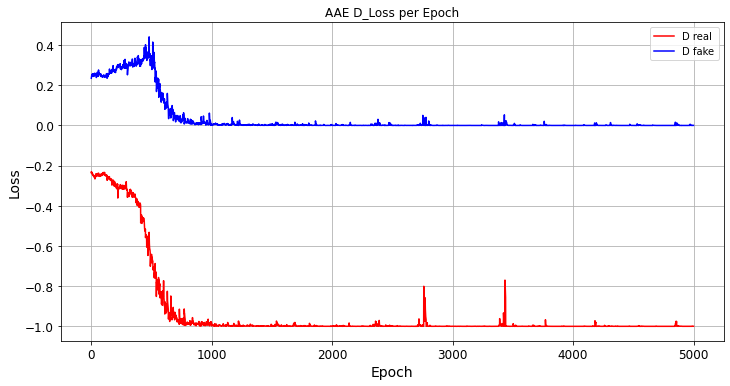

G_Loss: 


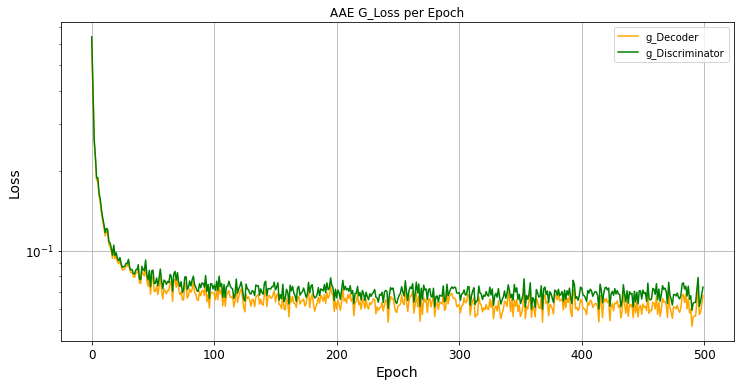

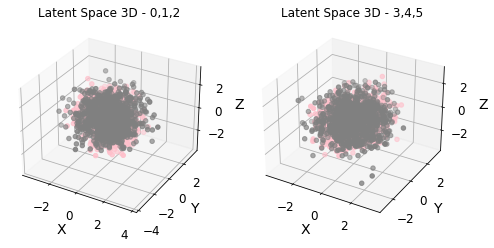

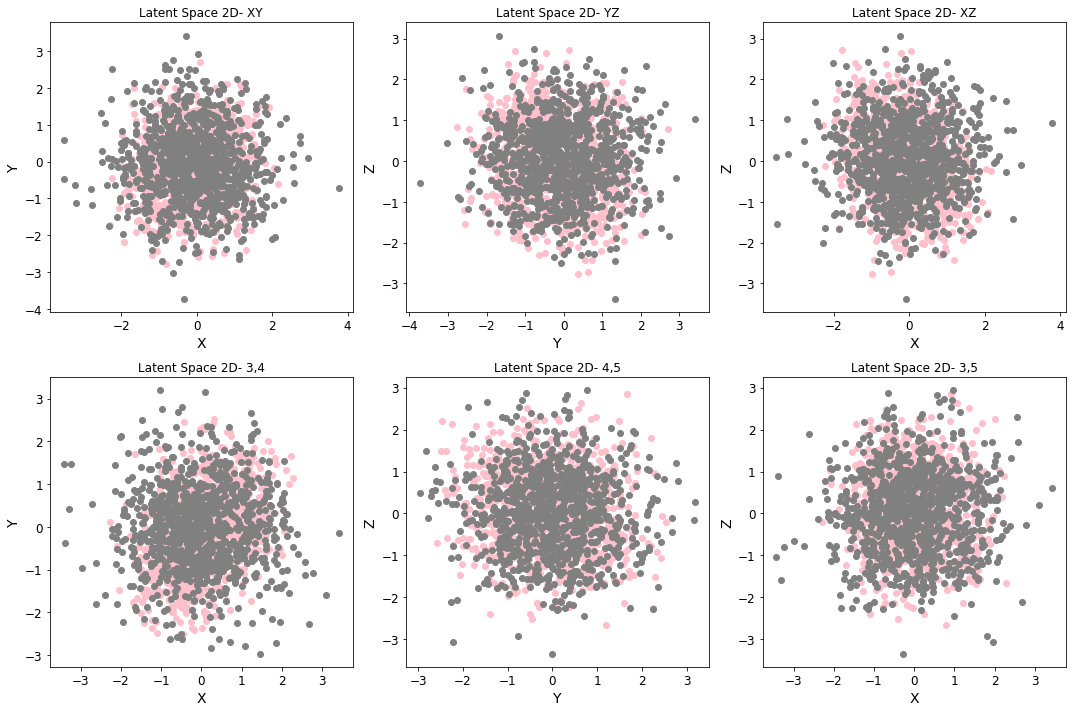

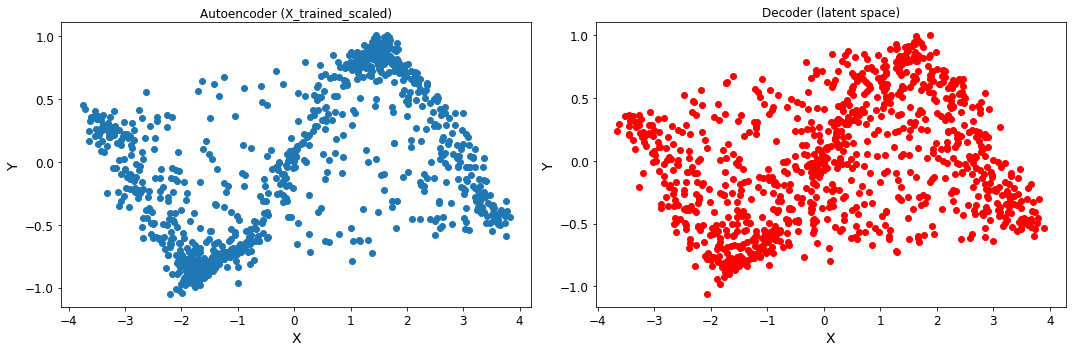

encoder output shape (1000, 6)


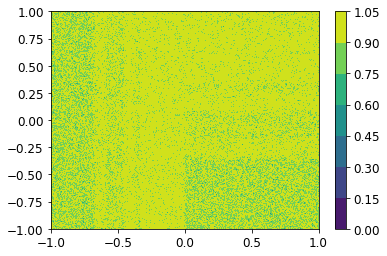

501 [D real: -0.641513, D fake: 0.327637], [Enc/Dec loss: 0.057107, Enc/Dis: 0.061519]
502 [D real: -0.683704, D fake: 0.325902], [Enc/Dec loss: 0.067054, Enc/Dis: 0.072050]
503 [D real: -0.654405, D fake: 0.301767], [Enc/Dec loss: 0.068985, Enc/Dis: 0.073768]
504 [D real: -0.658943, D fake: 0.278676], [Enc/Dec loss: 0.065194, Enc/Dis: 0.069558]
505 [D real: -0.660407, D fake: 0.280462], [Enc/Dec loss: 0.056447, Enc/Dis: 0.061233]
506 [D real: -0.664234, D fake: 0.285712], [Enc/Dec loss: 0.062016, Enc/Dis: 0.067677]
507 [D real: -0.662392, D fake: 0.289844], [Enc/Dec loss: 0.060641, Enc/Dis: 0.066663]
508 [D real: -0.667581, D fake: 0.286232], [Enc/Dec loss: 0.065133, Enc/Dis: 0.071165]
509 [D real: -0.675899, D fake: 0.286738], [Enc/Dec loss: 0.064990, Enc/Dis: 0.071527]
510 [D real: -0.674654, D fake: 0.291105], [Enc/Dec loss: 0.060608, Enc/Dis: 0.067113]
511 [D real: -0.675540, D fake: 0.415340], [Enc/Dec loss: 0.058709, Enc/Dis: 0.065513]
512 [D real: -0.694268, D fake: 0.354413], 

596 [D real: -0.832628, D fake: 0.136344], [Enc/Dec loss: 0.058073, Enc/Dis: 0.065669]
597 [D real: -0.845277, D fake: 0.131198], [Enc/Dec loss: 0.066128, Enc/Dis: 0.073462]
598 [D real: -0.857148, D fake: 0.128327], [Enc/Dec loss: 0.063874, Enc/Dis: 0.071207]
599 [D real: -0.851909, D fake: 0.130626], [Enc/Dec loss: 0.055480, Enc/Dis: 0.062485]
600 [D real: -0.846267, D fake: 0.132235], [Enc/Dec loss: 0.063023, Enc/Dis: 0.070049]
601 [D real: -0.772879, D fake: 0.116245], [Enc/Dec loss: 0.059805, Enc/Dis: 0.067168]
602 [D real: -0.847289, D fake: 0.113266], [Enc/Dec loss: 0.056005, Enc/Dis: 0.063481]
603 [D real: -0.850164, D fake: 0.115830], [Enc/Dec loss: 0.058999, Enc/Dis: 0.066765]
604 [D real: -0.859835, D fake: 0.112482], [Enc/Dec loss: 0.062823, Enc/Dis: 0.070541]
605 [D real: -0.877651, D fake: 0.118786], [Enc/Dec loss: 0.060227, Enc/Dis: 0.067991]
606 [D real: -0.886259, D fake: 0.120376], [Enc/Dec loss: 0.062498, Enc/Dis: 0.070682]
607 [D real: -0.894362, D fake: 0.131759], 

691 [D real: -0.953514, D fake: 0.064364], [Enc/Dec loss: 0.057178, Enc/Dis: 0.063592]
692 [D real: -0.965626, D fake: 0.042011], [Enc/Dec loss: 0.057909, Enc/Dis: 0.064638]
693 [D real: -0.967814, D fake: 0.034688], [Enc/Dec loss: 0.059034, Enc/Dis: 0.065542]
694 [D real: -0.929529, D fake: 0.050324], [Enc/Dec loss: 0.061783, Enc/Dis: 0.068718]
695 [D real: -0.936653, D fake: 0.047005], [Enc/Dec loss: 0.058976, Enc/Dis: 0.065845]
696 [D real: -0.937271, D fake: 0.049596], [Enc/Dec loss: 0.055797, Enc/Dis: 0.063226]
697 [D real: -0.942989, D fake: 0.046456], [Enc/Dec loss: 0.060032, Enc/Dis: 0.067482]
698 [D real: -0.947970, D fake: 0.043048], [Enc/Dec loss: 0.058385, Enc/Dis: 0.066223]
699 [D real: -0.951623, D fake: 0.041799], [Enc/Dec loss: 0.067540, Enc/Dis: 0.075210]
700 [D real: -0.955899, D fake: 0.039260], [Enc/Dec loss: 0.066291, Enc/Dis: 0.073764]
701 [D real: -0.952588, D fake: 0.017732], [Enc/Dec loss: 0.060534, Enc/Dis: 0.067391]
702 [D real: -0.945164, D fake: 0.033713], 

786 [D real: -0.988310, D fake: 0.016714], [Enc/Dec loss: 0.062238, Enc/Dis: 0.070450]
787 [D real: -0.987931, D fake: 0.015920], [Enc/Dec loss: 0.062726, Enc/Dis: 0.071026]
788 [D real: -0.987557, D fake: 0.015817], [Enc/Dec loss: 0.054275, Enc/Dis: 0.062222]
789 [D real: -0.986490, D fake: 0.014399], [Enc/Dec loss: 0.052912, Enc/Dis: 0.060702]
790 [D real: -0.986202, D fake: 0.014094], [Enc/Dec loss: 0.064563, Enc/Dis: 0.072496]
791 [D real: -0.988455, D fake: 0.017166], [Enc/Dec loss: 0.059907, Enc/Dis: 0.067729]
792 [D real: -0.992248, D fake: 0.014658], [Enc/Dec loss: 0.057858, Enc/Dis: 0.065490]
793 [D real: -0.989827, D fake: 0.013899], [Enc/Dec loss: 0.061917, Enc/Dis: 0.069372]
794 [D real: -0.989821, D fake: 0.013370], [Enc/Dec loss: 0.057890, Enc/Dis: 0.065449]
795 [D real: -0.987883, D fake: 0.013353], [Enc/Dec loss: 0.055786, Enc/Dis: 0.063506]
796 [D real: -0.980274, D fake: 0.014541], [Enc/Dec loss: 0.058268, Enc/Dis: 0.065713]
797 [D real: -0.978520, D fake: 0.013520], 

881 [D real: -0.986330, D fake: 0.006822], [Enc/Dec loss: 0.070635, Enc/Dis: 0.075750]
882 [D real: -0.989442, D fake: 0.008116], [Enc/Dec loss: 0.067395, Enc/Dis: 0.072319]
883 [D real: -0.985382, D fake: 0.008122], [Enc/Dec loss: 0.063975, Enc/Dis: 0.068899]
884 [D real: -0.988372, D fake: 0.010714], [Enc/Dec loss: 0.065114, Enc/Dis: 0.070706]
885 [D real: -0.989659, D fake: 0.013208], [Enc/Dec loss: 0.065460, Enc/Dis: 0.072322]
886 [D real: -0.990236, D fake: 0.011479], [Enc/Dec loss: 0.065405, Enc/Dis: 0.071108]
887 [D real: -0.990461, D fake: 0.010379], [Enc/Dec loss: 0.069993, Enc/Dis: 0.075442]
888 [D real: -0.990152, D fake: 0.009732], [Enc/Dec loss: 0.063025, Enc/Dis: 0.068398]
889 [D real: -0.990815, D fake: 0.010452], [Enc/Dec loss: 0.063232, Enc/Dis: 0.068725]
890 [D real: -0.990655, D fake: 0.011030], [Enc/Dec loss: 0.060948, Enc/Dis: 0.066231]
891 [D real: -0.990603, D fake: 0.003531], [Enc/Dec loss: 0.055050, Enc/Dis: 0.060130]
892 [D real: -0.992019, D fake: 0.007923], 

976 [D real: -0.989258, D fake: 0.005776], [Enc/Dec loss: 0.060564, Enc/Dis: 0.066752]
977 [D real: -0.981431, D fake: 0.005355], [Enc/Dec loss: 0.059739, Enc/Dis: 0.065698]
978 [D real: -0.983261, D fake: 0.004979], [Enc/Dec loss: 0.063954, Enc/Dis: 0.070225]
979 [D real: -0.984865, D fake: 0.005366], [Enc/Dec loss: 0.059214, Enc/Dis: 0.065886]
980 [D real: -0.985954, D fake: 0.006715], [Enc/Dec loss: 0.058698, Enc/Dis: 0.065132]
981 [D real: -0.995403, D fake: 0.061584], [Enc/Dec loss: 0.068105, Enc/Dis: 0.074661]
982 [D real: -0.996545, D fake: 0.046982], [Enc/Dec loss: 0.055388, Enc/Dis: 0.062182]
983 [D real: -0.997222, D fake: 0.032345], [Enc/Dec loss: 0.060635, Enc/Dis: 0.067545]
984 [D real: -0.996958, D fake: 0.025263], [Enc/Dec loss: 0.061190, Enc/Dis: 0.068066]
985 [D real: -0.994449, D fake: 0.020398], [Enc/Dec loss: 0.058568, Enc/Dis: 0.065315]
986 [D real: -0.993118, D fake: 0.017286], [Enc/Dec loss: 0.066670, Enc/Dis: 0.073633]
987 [D real: -0.992766, D fake: 0.015582], 

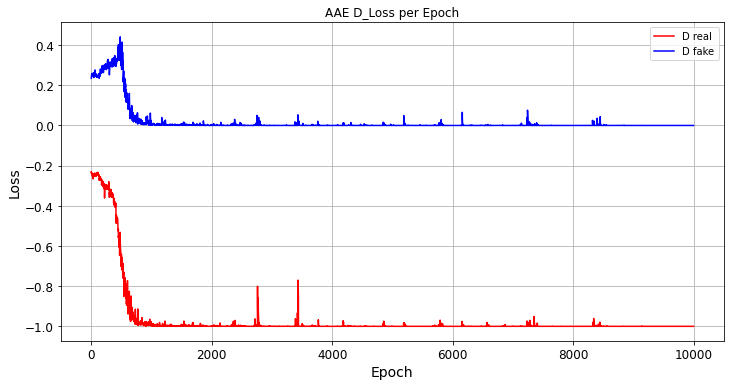

G_Loss: 


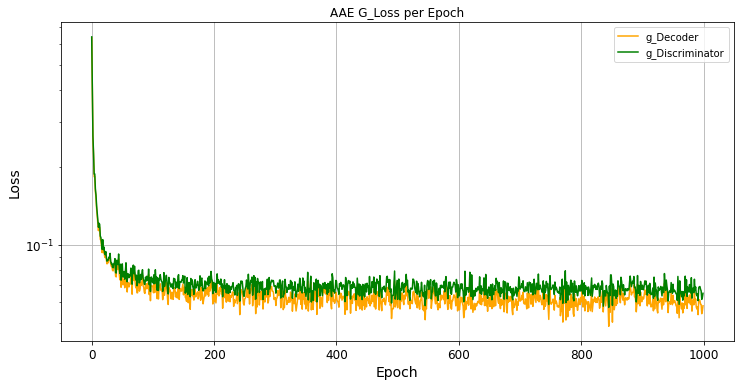

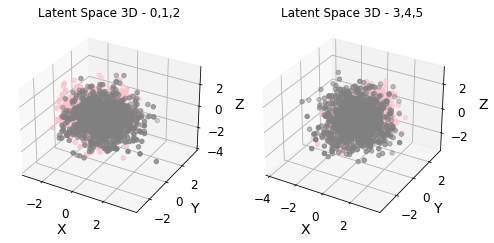

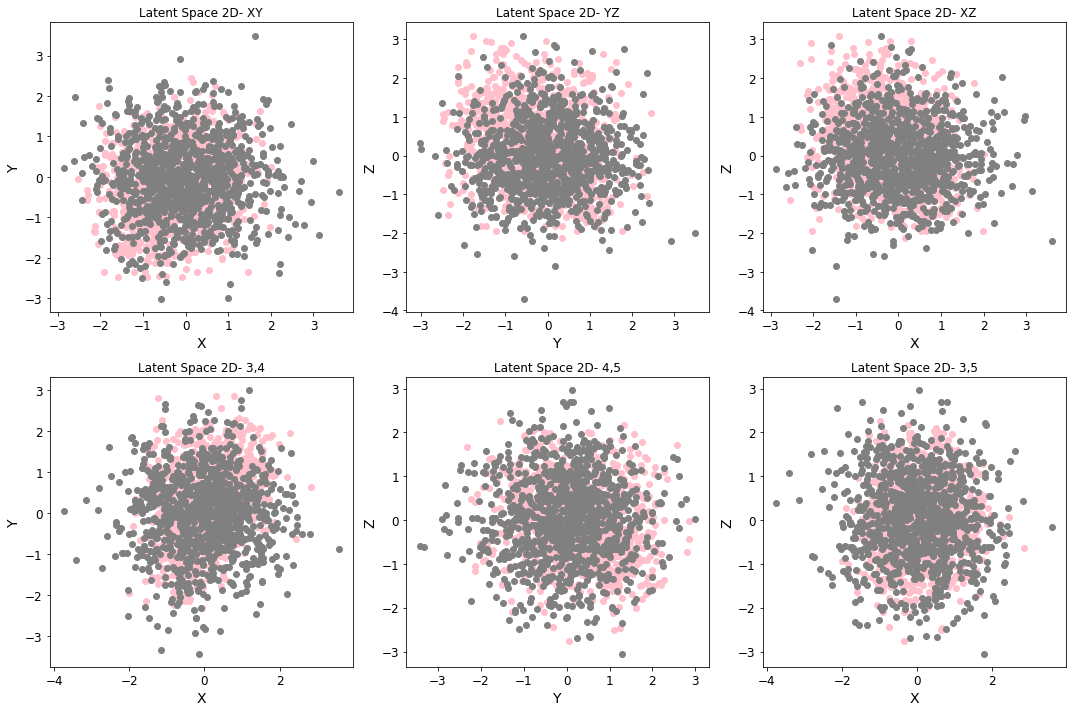

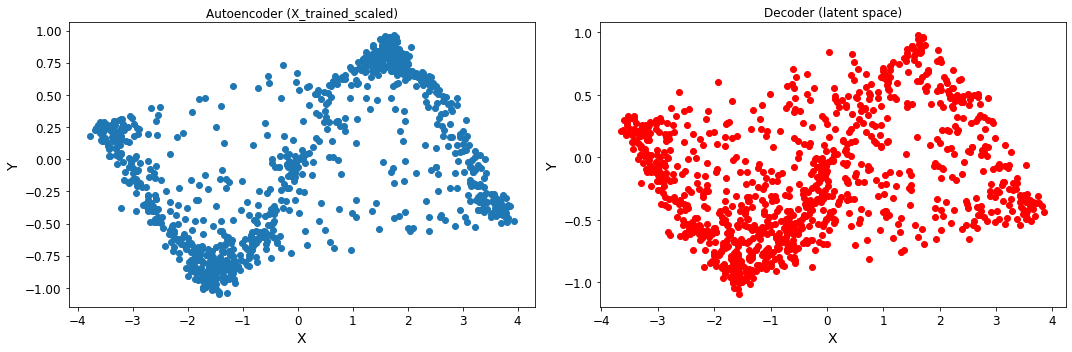

encoder output shape (1000, 6)


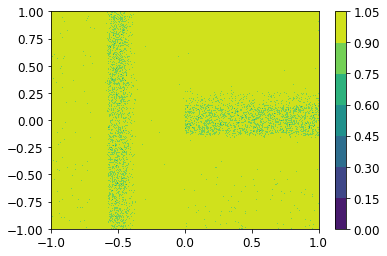

1001 [D real: -0.998567, D fake: 0.001387], [Enc/Dec loss: 0.060484, Enc/Dis: 0.067146]
1002 [D real: -0.991116, D fake: 0.002789], [Enc/Dec loss: 0.063863, Enc/Dis: 0.070688]
1003 [D real: -0.990495, D fake: 0.002775], [Enc/Dec loss: 0.062901, Enc/Dis: 0.069492]
1004 [D real: -0.991767, D fake: 0.002505], [Enc/Dec loss: 0.060811, Enc/Dis: 0.067538]
1005 [D real: -0.992023, D fake: 0.002304], [Enc/Dec loss: 0.058463, Enc/Dis: 0.065117]
1006 [D real: -0.993045, D fake: 0.003981], [Enc/Dec loss: 0.056721, Enc/Dis: 0.062810]
1007 [D real: -0.993257, D fake: 0.003603], [Enc/Dec loss: 0.061893, Enc/Dis: 0.067914]
1008 [D real: -0.994063, D fake: 0.003436], [Enc/Dec loss: 0.063733, Enc/Dis: 0.070254]
1009 [D real: -0.994016, D fake: 0.003229], [Enc/Dec loss: 0.060158, Enc/Dis: 0.067098]
1010 [D real: -0.993753, D fake: 0.005503], [Enc/Dec loss: 0.059424, Enc/Dis: 0.066099]
1011 [D real: -0.991700, D fake: 0.003126], [Enc/Dec loss: 0.064891, Enc/Dis: 0.071301]
1012 [D real: -0.994840, D fake:

1095 [D real: -0.987603, D fake: 0.007179], [Enc/Dec loss: 0.070358, Enc/Dis: 0.076981]
1096 [D real: -0.989608, D fake: 0.006472], [Enc/Dec loss: 0.068899, Enc/Dis: 0.075698]
1097 [D real: -0.990893, D fake: 0.006974], [Enc/Dec loss: 0.064171, Enc/Dis: 0.070835]
1098 [D real: -0.990097, D fake: 0.006350], [Enc/Dec loss: 0.060535, Enc/Dis: 0.067072]
1099 [D real: -0.990927, D fake: 0.005822], [Enc/Dec loss: 0.060462, Enc/Dis: 0.066596]
1100 [D real: -0.991730, D fake: 0.005793], [Enc/Dec loss: 0.066770, Enc/Dis: 0.072443]
1101 [D real: -0.998793, D fake: 0.004252], [Enc/Dec loss: 0.060726, Enc/Dis: 0.066736]
1102 [D real: -0.997612, D fake: 0.005905], [Enc/Dec loss: 0.058369, Enc/Dis: 0.064490]
1103 [D real: -0.997387, D fake: 0.004789], [Enc/Dec loss: 0.062739, Enc/Dis: 0.068568]
1104 [D real: -0.996453, D fake: 0.010414], [Enc/Dec loss: 0.065935, Enc/Dis: 0.071666]
1105 [D real: -0.996864, D fake: 0.008892], [Enc/Dec loss: 0.063404, Enc/Dis: 0.068885]
1106 [D real: -0.996637, D fake:

1189 [D real: -0.992775, D fake: 0.004542], [Enc/Dec loss: 0.061119, Enc/Dis: 0.069731]
1190 [D real: -0.993392, D fake: 0.004149], [Enc/Dec loss: 0.060101, Enc/Dis: 0.068814]
1191 [D real: -0.999188, D fake: 0.006325], [Enc/Dec loss: 0.060040, Enc/Dis: 0.068926]
1192 [D real: -0.999076, D fake: 0.003419], [Enc/Dec loss: 0.059000, Enc/Dis: 0.068084]
1193 [D real: -0.999134, D fake: 0.002386], [Enc/Dec loss: 0.056547, Enc/Dis: 0.065796]
1194 [D real: -0.999209, D fake: 0.003583], [Enc/Dec loss: 0.051130, Enc/Dis: 0.060462]
1195 [D real: -0.999338, D fake: 0.004147], [Enc/Dec loss: 0.056764, Enc/Dis: 0.066134]
1196 [D real: -0.999198, D fake: 0.004141], [Enc/Dec loss: 0.061258, Enc/Dis: 0.070566]
1197 [D real: -0.999253, D fake: 0.003727], [Enc/Dec loss: 0.055083, Enc/Dis: 0.064444]
1198 [D real: -0.999282, D fake: 0.003296], [Enc/Dec loss: 0.065404, Enc/Dis: 0.074627]
1199 [D real: -0.999336, D fake: 0.003075], [Enc/Dec loss: 0.058835, Enc/Dis: 0.067866]
1200 [D real: -0.999120, D fake:

1283 [D real: -0.999011, D fake: 0.001559], [Enc/Dec loss: 0.055212, Enc/Dis: 0.064351]
1284 [D real: -0.999124, D fake: 0.001568], [Enc/Dec loss: 0.057163, Enc/Dis: 0.066272]
1285 [D real: -0.998784, D fake: 0.001371], [Enc/Dec loss: 0.054532, Enc/Dis: 0.063650]
1286 [D real: -0.998750, D fake: 0.001766], [Enc/Dec loss: 0.059463, Enc/Dis: 0.068729]
1287 [D real: -0.998390, D fake: 0.001650], [Enc/Dec loss: 0.056860, Enc/Dis: 0.066177]
1288 [D real: -0.998115, D fake: 0.001537], [Enc/Dec loss: 0.061070, Enc/Dis: 0.070320]
1289 [D real: -0.998014, D fake: 0.003462], [Enc/Dec loss: 0.056223, Enc/Dis: 0.065575]
1290 [D real: -0.998048, D fake: 0.003226], [Enc/Dec loss: 0.052742, Enc/Dis: 0.061983]
1291 [D real: -0.995411, D fake: 0.000361], [Enc/Dec loss: 0.062251, Enc/Dis: 0.071364]
1292 [D real: -0.995126, D fake: 0.000643], [Enc/Dec loss: 0.055292, Enc/Dis: 0.064380]
1293 [D real: -0.996600, D fake: 0.000980], [Enc/Dec loss: 0.067026, Enc/Dis: 0.076103]
1294 [D real: -0.996729, D fake:

1377 [D real: -0.997980, D fake: 0.001395], [Enc/Dec loss: 0.060658, Enc/Dis: 0.067595]
1378 [D real: -0.997968, D fake: 0.001440], [Enc/Dec loss: 0.057954, Enc/Dis: 0.064897]
1379 [D real: -0.998020, D fake: 0.001416], [Enc/Dec loss: 0.058058, Enc/Dis: 0.065086]
1380 [D real: -0.997830, D fake: 0.001380], [Enc/Dec loss: 0.059943, Enc/Dis: 0.067244]
1381 [D real: -0.997627, D fake: 0.000067], [Enc/Dec loss: 0.061637, Enc/Dis: 0.068709]
1382 [D real: -0.998358, D fake: 0.001103], [Enc/Dec loss: 0.058443, Enc/Dis: 0.065379]
1383 [D real: -0.998826, D fake: 0.000932], [Enc/Dec loss: 0.059607, Enc/Dis: 0.066751]
1384 [D real: -0.999063, D fake: 0.000852], [Enc/Dec loss: 0.059315, Enc/Dis: 0.066348]
1385 [D real: -0.996753, D fake: 0.001998], [Enc/Dec loss: 0.062100, Enc/Dis: 0.068883]
1386 [D real: -0.997173, D fake: 0.001816], [Enc/Dec loss: 0.059698, Enc/Dis: 0.066533]
1387 [D real: -0.997517, D fake: 0.001609], [Enc/Dec loss: 0.061757, Enc/Dis: 0.067109]
1388 [D real: -0.997754, D fake:

1471 [D real: -0.999808, D fake: 0.000379], [Enc/Dec loss: 0.060290, Enc/Dis: 0.066632]
1472 [D real: -0.999805, D fake: 0.001153], [Enc/Dec loss: 0.063382, Enc/Dis: 0.069364]
1473 [D real: -0.999792, D fake: 0.001119], [Enc/Dec loss: 0.057175, Enc/Dis: 0.062880]
1474 [D real: -0.999818, D fake: 0.001961], [Enc/Dec loss: 0.056321, Enc/Dis: 0.062300]
1475 [D real: -0.999840, D fake: 0.001582], [Enc/Dec loss: 0.064420, Enc/Dis: 0.070115]
1476 [D real: -0.999667, D fake: 0.002353], [Enc/Dec loss: 0.066442, Enc/Dis: 0.071299]
1477 [D real: -0.999635, D fake: 0.002294], [Enc/Dec loss: 0.062104, Enc/Dis: 0.067171]
1478 [D real: -0.999639, D fake: 0.002037], [Enc/Dec loss: 0.067103, Enc/Dis: 0.072017]
1479 [D real: -0.999670, D fake: 0.002021], [Enc/Dec loss: 0.054779, Enc/Dis: 0.059907]
1480 [D real: -0.999584, D fake: 0.002278], [Enc/Dec loss: 0.064433, Enc/Dis: 0.069862]
1481 [D real: -0.999264, D fake: 0.005484], [Enc/Dec loss: 0.061500, Enc/Dis: 0.067157]
1482 [D real: -0.999459, D fake:

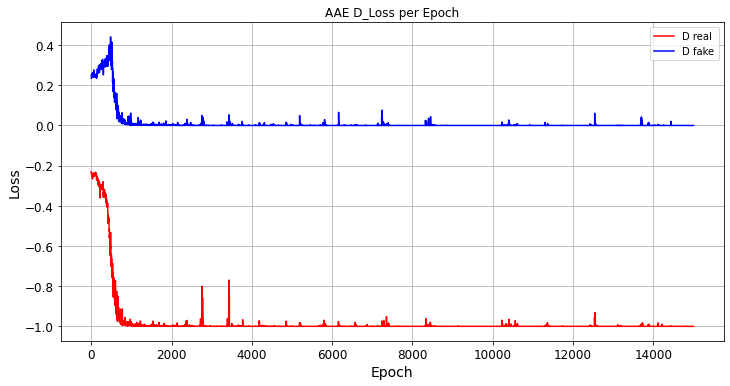

G_Loss: 


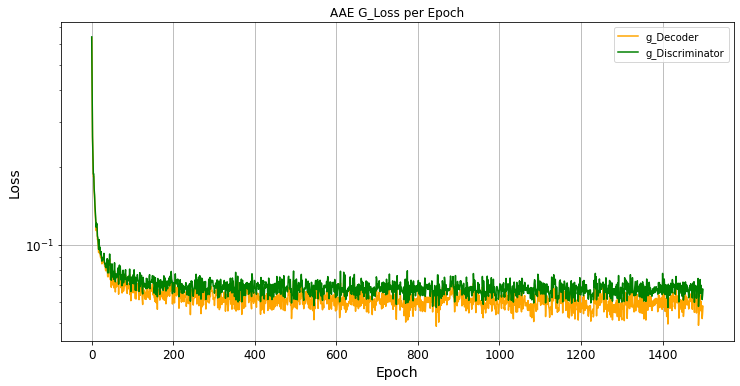

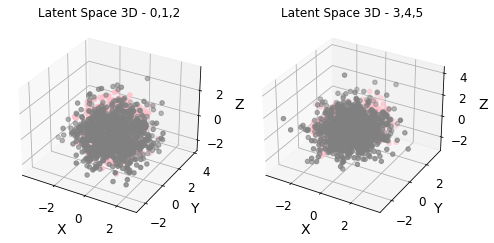

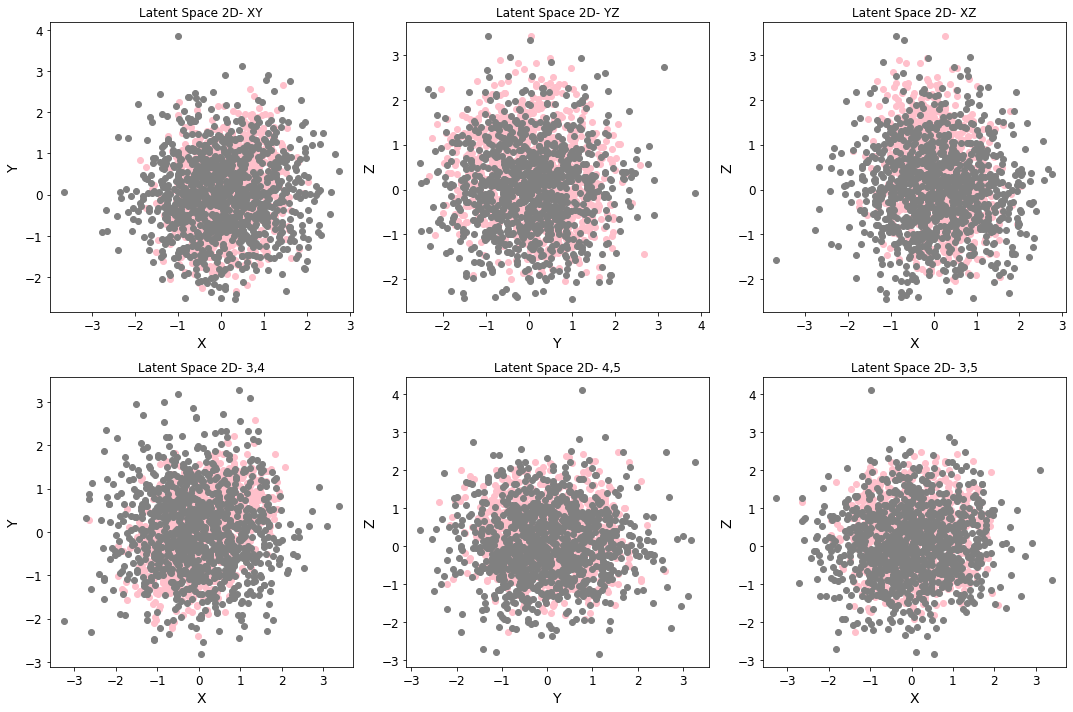

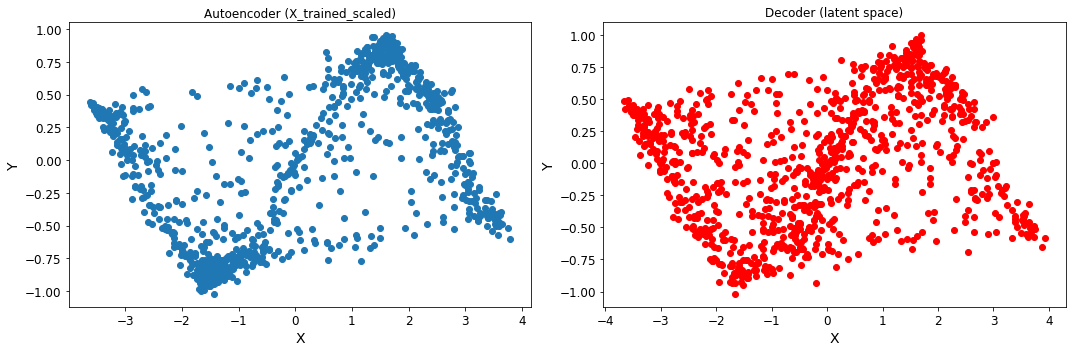

encoder output shape (1000, 6)


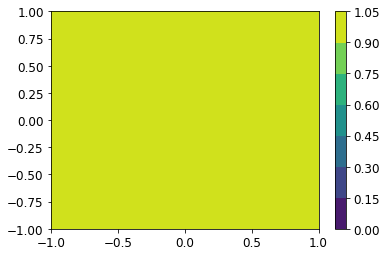

1501 [D real: -0.999944, D fake: 0.002777], [Enc/Dec loss: 0.060399, Enc/Dis: 0.069784]
1502 [D real: -0.999674, D fake: 0.008810], [Enc/Dec loss: 0.064332, Enc/Dis: 0.073655]
1503 [D real: -0.999582, D fake: 0.007742], [Enc/Dec loss: 0.058595, Enc/Dis: 0.067708]
1504 [D real: -0.999629, D fake: 0.006173], [Enc/Dec loss: 0.056953, Enc/Dis: 0.066052]
1505 [D real: -0.999668, D fake: 0.005638], [Enc/Dec loss: 0.053544, Enc/Dis: 0.062674]
1506 [D real: -0.999706, D fake: 0.005009], [Enc/Dec loss: 0.061259, Enc/Dis: 0.070155]
1507 [D real: -0.999651, D fake: 0.004351], [Enc/Dec loss: 0.062626, Enc/Dis: 0.071288]
1508 [D real: -0.999616, D fake: 0.005073], [Enc/Dec loss: 0.057933, Enc/Dis: 0.066594]
1509 [D real: -0.999511, D fake: 0.004537], [Enc/Dec loss: 0.054535, Enc/Dis: 0.063228]
1510 [D real: -0.999473, D fake: 0.004122], [Enc/Dec loss: 0.057320, Enc/Dis: 0.065987]
1511 [D real: -0.999739, D fake: 0.000157], [Enc/Dec loss: 0.058877, Enc/Dis: 0.067689]
1512 [D real: -0.998844, D fake:

1595 [D real: -0.997351, D fake: 0.001821], [Enc/Dec loss: 0.059830, Enc/Dis: 0.065048]
1596 [D real: -0.996646, D fake: 0.001580], [Enc/Dec loss: 0.057395, Enc/Dis: 0.063990]
1597 [D real: -0.996899, D fake: 0.001387], [Enc/Dec loss: 0.057589, Enc/Dis: 0.066506]
1598 [D real: -0.997249, D fake: 0.001230], [Enc/Dec loss: 0.056848, Enc/Dis: 0.060341]
1599 [D real: -0.997528, D fake: 0.001247], [Enc/Dec loss: 0.058733, Enc/Dis: 0.063777]
1600 [D real: -0.997720, D fake: 0.001311], [Enc/Dec loss: 0.056418, Enc/Dis: 0.065367]
1601 [D real: -0.999810, D fake: 0.000172], [Enc/Dec loss: 0.061194, Enc/Dis: 0.064679]
1602 [D real: -0.999736, D fake: 0.000261], [Enc/Dec loss: 0.059684, Enc/Dis: 0.065319]
1603 [D real: -0.999368, D fake: 0.001273], [Enc/Dec loss: 0.056479, Enc/Dis: 0.064834]
1604 [D real: -0.997820, D fake: 0.001782], [Enc/Dec loss: 0.060501, Enc/Dis: 0.066838]
1605 [D real: -0.998099, D fake: 0.001527], [Enc/Dec loss: 0.063899, Enc/Dis: 0.068409]
1606 [D real: -0.996074, D fake:

1689 [D real: -0.996625, D fake: 0.000950], [Enc/Dec loss: 0.064238, Enc/Dis: 0.070624]
1690 [D real: -0.996956, D fake: 0.001901], [Enc/Dec loss: 0.061583, Enc/Dis: 0.067993]
1691 [D real: -0.980500, D fake: 0.016238], [Enc/Dec loss: 0.058666, Enc/Dis: 0.064921]
1692 [D real: -0.989762, D fake: 0.008225], [Enc/Dec loss: 0.064501, Enc/Dis: 0.070998]
1693 [D real: -0.993160, D fake: 0.012420], [Enc/Dec loss: 0.059790, Enc/Dis: 0.066474]
1694 [D real: -0.994844, D fake: 0.009577], [Enc/Dec loss: 0.057488, Enc/Dis: 0.064071]
1695 [D real: -0.995760, D fake: 0.007821], [Enc/Dec loss: 0.059493, Enc/Dis: 0.065202]
1696 [D real: -0.996349, D fake: 0.006533], [Enc/Dec loss: 0.059467, Enc/Dis: 0.065885]
1697 [D real: -0.996703, D fake: 0.005653], [Enc/Dec loss: 0.058810, Enc/Dis: 0.066050]
1698 [D real: -0.997092, D fake: 0.004953], [Enc/Dec loss: 0.058064, Enc/Dis: 0.064948]
1699 [D real: -0.996651, D fake: 0.004457], [Enc/Dec loss: 0.064230, Enc/Dis: 0.070969]
1700 [D real: -0.995685, D fake:

1783 [D real: -0.999272, D fake: 0.001169], [Enc/Dec loss: 0.056366, Enc/Dis: 0.064326]
1784 [D real: -0.999441, D fake: 0.004135], [Enc/Dec loss: 0.055120, Enc/Dis: 0.063248]
1785 [D real: -0.999538, D fake: 0.003411], [Enc/Dec loss: 0.051597, Enc/Dis: 0.059617]
1786 [D real: -0.999590, D fake: 0.003154], [Enc/Dec loss: 0.057687, Enc/Dis: 0.065803]
1787 [D real: -0.999637, D fake: 0.002720], [Enc/Dec loss: 0.056275, Enc/Dis: 0.064586]
1788 [D real: -0.999662, D fake: 0.002622], [Enc/Dec loss: 0.068530, Enc/Dis: 0.076923]
1789 [D real: -0.999673, D fake: 0.002447], [Enc/Dec loss: 0.055705, Enc/Dis: 0.064115]
1790 [D real: -0.999679, D fake: 0.002369], [Enc/Dec loss: 0.064739, Enc/Dis: 0.073126]
1791 [D real: -0.999963, D fake: 0.000387], [Enc/Dec loss: 0.055806, Enc/Dis: 0.063929]
1792 [D real: -0.999484, D fake: 0.000226], [Enc/Dec loss: 0.054841, Enc/Dis: 0.063032]
1793 [D real: -0.999368, D fake: 0.000202], [Enc/Dec loss: 0.055544, Enc/Dis: 0.063685]
1794 [D real: -0.999487, D fake:

1877 [D real: -0.998609, D fake: 0.000569], [Enc/Dec loss: 0.055614, Enc/Dis: 0.064156]
1878 [D real: -0.998760, D fake: 0.000663], [Enc/Dec loss: 0.055710, Enc/Dis: 0.064050]
1879 [D real: -0.998853, D fake: 0.000604], [Enc/Dec loss: 0.057686, Enc/Dis: 0.065969]
1880 [D real: -0.998826, D fake: 0.000549], [Enc/Dec loss: 0.055423, Enc/Dis: 0.063364]
1881 [D real: -0.998492, D fake: 0.000161], [Enc/Dec loss: 0.056986, Enc/Dis: 0.065529]
1882 [D real: -0.999218, D fake: 0.000384], [Enc/Dec loss: 0.060491, Enc/Dis: 0.068999]
1883 [D real: -0.999290, D fake: 0.000342], [Enc/Dec loss: 0.057045, Enc/Dis: 0.065553]
1884 [D real: -0.999450, D fake: 0.000278], [Enc/Dec loss: 0.058765, Enc/Dis: 0.067297]
1885 [D real: -0.999493, D fake: 0.000341], [Enc/Dec loss: 0.059067, Enc/Dis: 0.067753]
1886 [D real: -0.999573, D fake: 0.000311], [Enc/Dec loss: 0.063311, Enc/Dis: 0.071911]
1887 [D real: -0.999550, D fake: 0.000278], [Enc/Dec loss: 0.057096, Enc/Dis: 0.065559]
1888 [D real: -0.998906, D fake:

1971 [D real: -0.999522, D fake: 0.000507], [Enc/Dec loss: 0.052458, Enc/Dis: 0.061152]
1972 [D real: -0.999635, D fake: 0.000298], [Enc/Dec loss: 0.062167, Enc/Dis: 0.070849]
1973 [D real: -0.999703, D fake: 0.000239], [Enc/Dec loss: 0.062111, Enc/Dis: 0.070594]
1974 [D real: -0.999725, D fake: 0.000187], [Enc/Dec loss: 0.055071, Enc/Dis: 0.063276]
1975 [D real: -0.999745, D fake: 0.000175], [Enc/Dec loss: 0.054361, Enc/Dis: 0.062836]
1976 [D real: -0.999699, D fake: 0.000207], [Enc/Dec loss: 0.058691, Enc/Dis: 0.067338]
1977 [D real: -0.999737, D fake: 0.000190], [Enc/Dec loss: 0.060572, Enc/Dis: 0.069126]
1978 [D real: -0.999710, D fake: 0.000183], [Enc/Dec loss: 0.058251, Enc/Dis: 0.066780]
1979 [D real: -0.999539, D fake: 0.000196], [Enc/Dec loss: 0.055790, Enc/Dis: 0.064126]
1980 [D real: -0.999576, D fake: 0.000182], [Enc/Dec loss: 0.061821, Enc/Dis: 0.070190]
1981 [D real: -0.999841, D fake: 0.000246], [Enc/Dec loss: 0.060861, Enc/Dis: 0.069260]
1982 [D real: -0.999794, D fake:

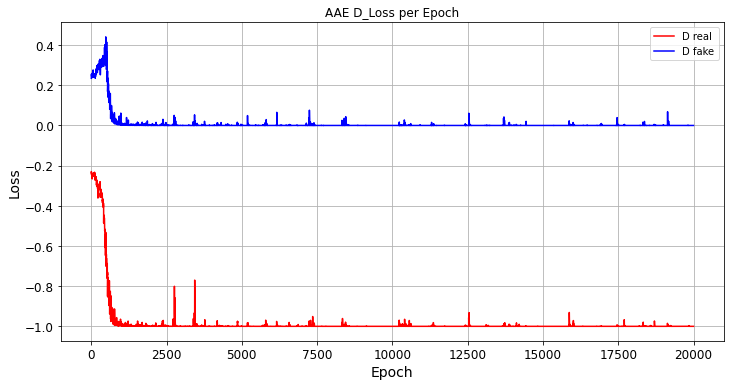

G_Loss: 


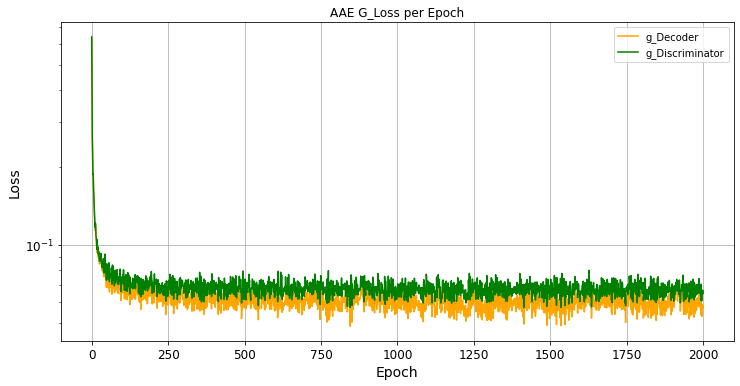

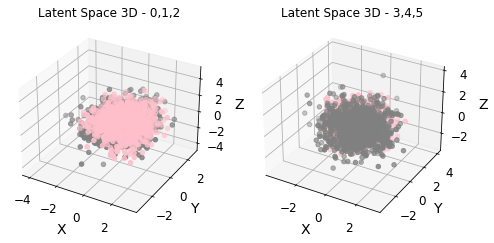

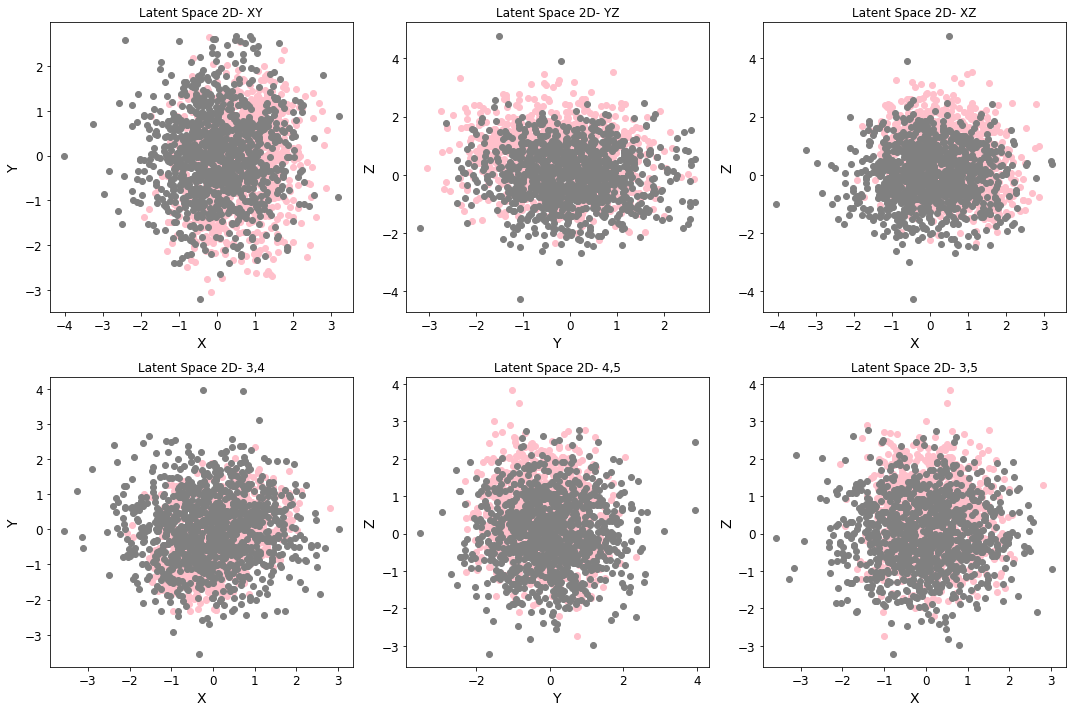

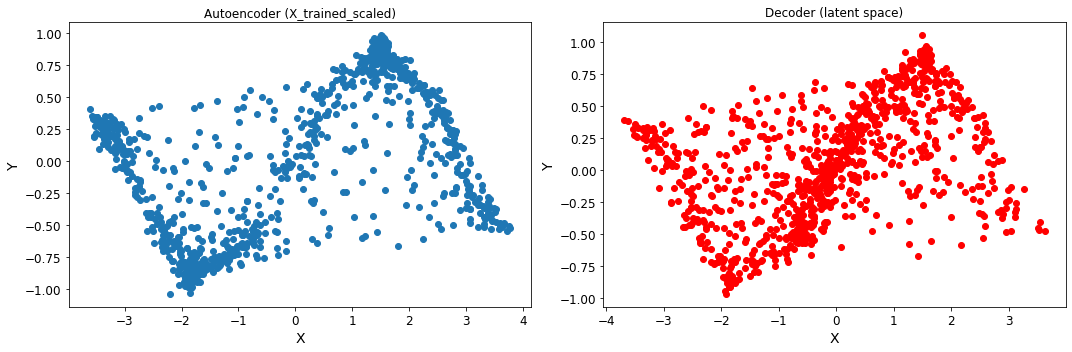

encoder output shape (1000, 6)


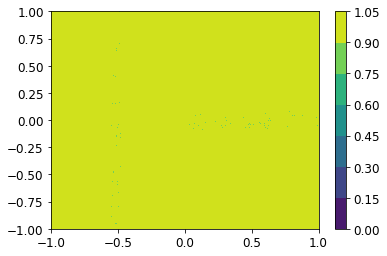

In [10]:
hist = aae.train(i, Z, batch_size, train_dataset, epochs, scaler, X_train_scaled, scaled, X_train, y_train )


### Plot Loss

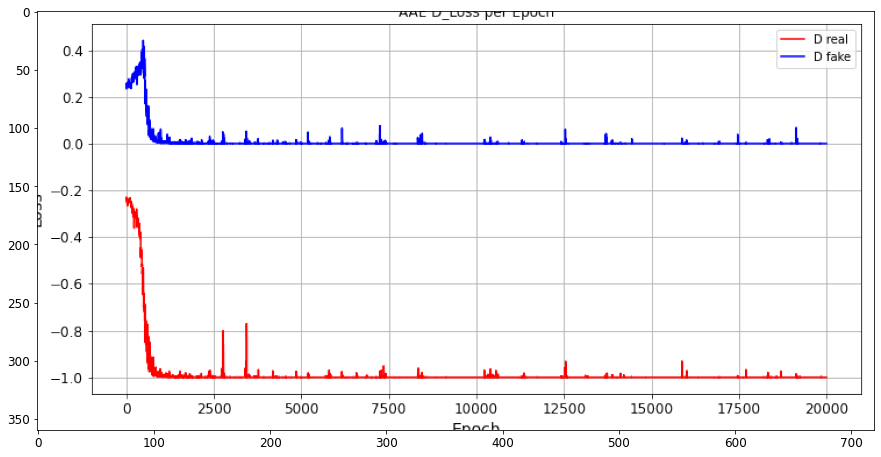

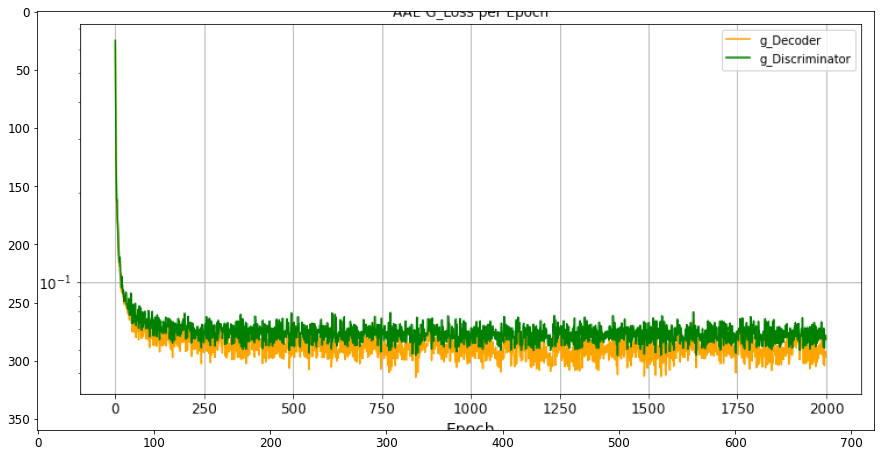

In [11]:
from PIL import Image

#Discriminator Loss
Dloss = Image.open('AAE/Losses/D_loss_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.figure("D_loss",figsize=[15,10])
plt.imshow(Dloss)
#Encoder Loss
Gloss = Image.open('AAE/Losses/G_loss_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.figure("G_loss",figsize=[15,10])
plt.imshow(Gloss)


### Samping from the latent space

In [12]:
epochs = epochs

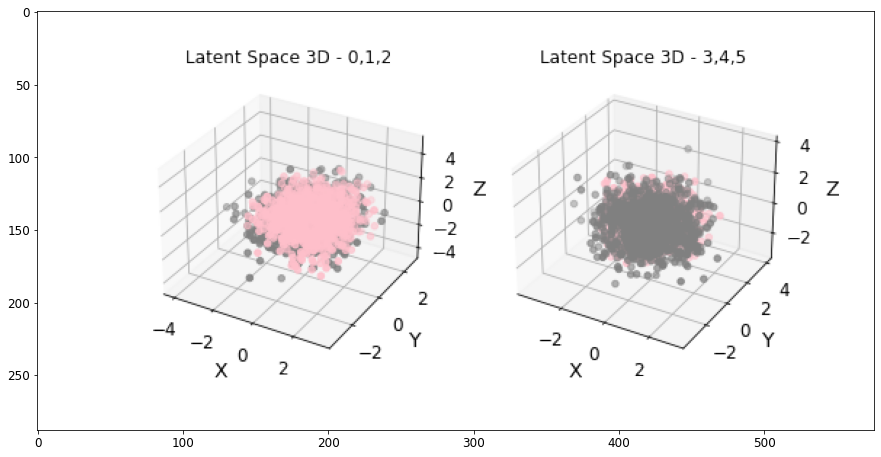

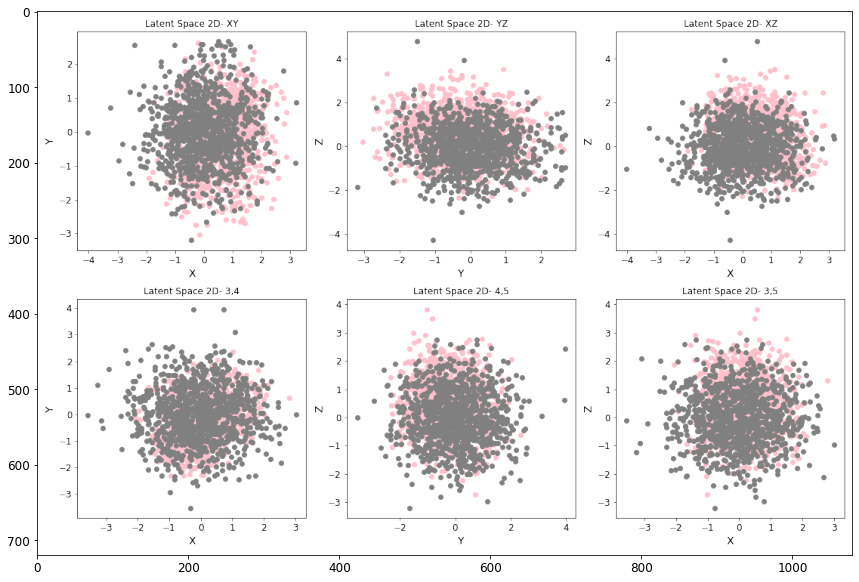

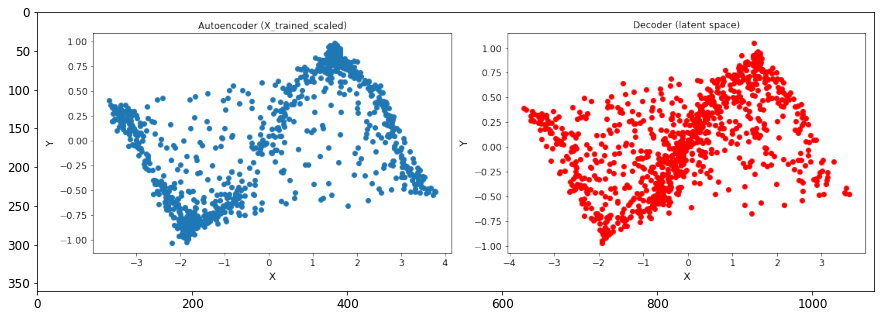

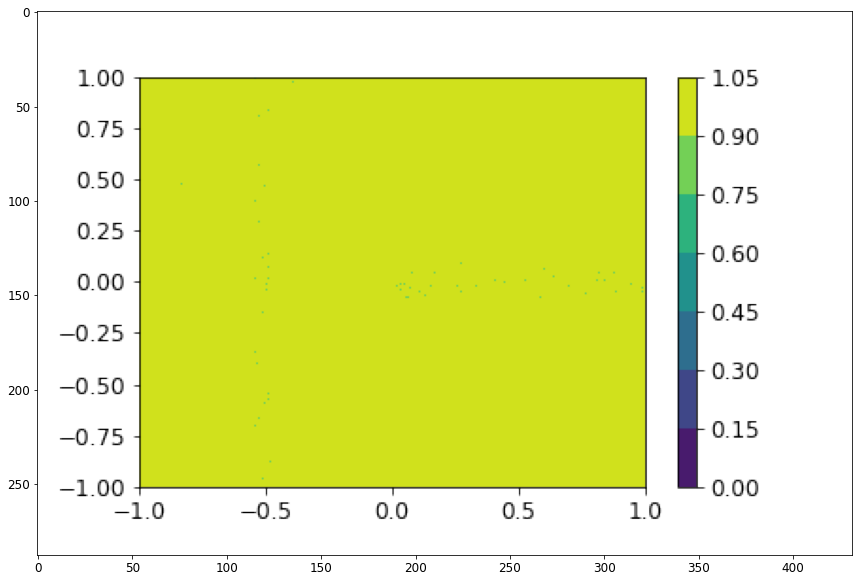

In [13]:
img = Image.open('AAE/Result/v'+str(i)+'_latent_space 3D_'+str(epochs)+'.png')
plt.figure("3D",figsize=[15,10])
plt.imshow(img)

img2 = Image.open('AAE/Result/v'+str(i)+'_Latent_Space 2D_'+str(epochs)+'.png')
plt.figure("2D",figsize=[15,10])
plt.imshow(img2)

img3 = Image.open('AAE/Result/v_'+str(i)+'_epochs_'+str(epochs)+'.png')
plt.figure("Autoencoder",figsize=[15,10])
plt.imshow(img3)

img4 = Image.open('AAE/Result/'+'countour_line_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.figure("countour_line",figsize=[15,10])
plt.imshow(img4)


# Applying the prediction

In [14]:
i = i

In [15]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset, network

In [16]:
epochs = epochs

In [17]:
encoder = keras.models.load_model('./AAE/Models/encoder_v'+str(i)+'_'+str(epochs))
decoder = keras.models.load_model('./AAE/Models/decoder_v'+str(i)+'_'+str(epochs))
discriminator = keras.models.load_model('./AAE/Models/discriminator_v'+str(i)+'_'+str(epochs))

ValueError: Unknown loss function: wasserstein_loss

In [ ]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis_scaled.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [ ]:
X_generated = aae.predict(input_test, scaler)
print("X_generated :",X_generated.shape)

In [ ]:
if scenario in ("3d", "helix"):
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='orange') 
    plt.scatter(X_generated[:,0],X_generated[:,1])
    #plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    plt.savefig('AAE/Prediction/'+str(epochs)+'.png')
    